## TESTE t Student (duas amostras independentes) 

Amostras pequenas (menor que 30)

Não necessita conhecimento do desvio padrão

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/curso_estatistica_python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
enem_sp.head()

Objetivo:
Analisar a diferença entre as médias de dois componentes de redação do colégio y.






In [4]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [5]:
colegioy.shape

(30, 28)

In [6]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,548.8,576.4,59.2,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,603.9,577.6,61.6,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,615.4,601.1,592.6,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,São Paulo,1,1,1,1,574.7,658.6,59.4,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,592.9,560.7,603.8,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


1) Analisar a classificação das variáveis

In [7]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [8]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [9]:
import plotly.express as px

In [10]:
grafico = px.box(colegioy, y="COMP3")
grafico.show()

In [11]:
grafico = px.box(colegioy, y="COMP5")
grafico.show()

4) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [13]:
import scipy.stats as stats

In [19]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.COMP3)

(0.916003406047821, 0.02115193009376526)

In [20]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [22]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist = 'norm')

(0.20710628123776997, 0.0020381146556680296)

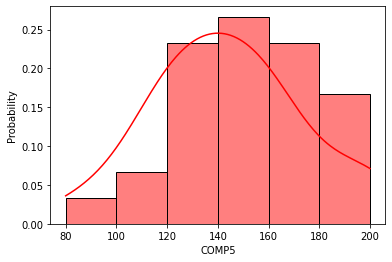

In [23]:
import seaborn as sns
sns.histplot(colegioy, x='COMP5', bins=6, color="red", kde=True, stat="probability");

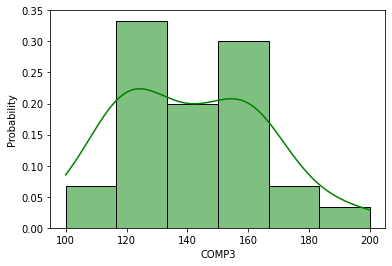

In [24]:
sns.histplot(colegioy, x='COMP3', bins=6, color="green", kde=True, stat="probability");

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt

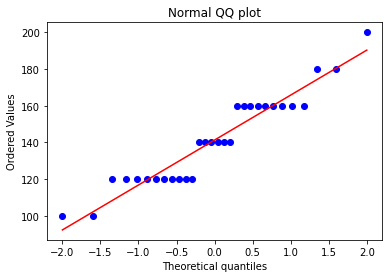

In [27]:
stats.probplot(colegioy['COMP3'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

5) HOMOGENEIDADE DAS VARIÂNCIAS (HOMOCEDASTICIDADE)

Variabilidade dos erros constante.

Ho = variâncias homogêneas : p > 0.05

Ha = variâncias não homogêneas : p <= 0.05

In [28]:
# teste de Levene
from scipy.stats import levene

In [29]:
stat, p = levene(colegioy.COMP3, colegioy.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.61
p-valor: 0.4382667191


**TESTE t-student**

Comparação das Médias das notas dos componentes 3 e 5 da redação do colégio Y.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p <= 0.05

In [30]:
import scipy.stats as stats

In [31]:
stat, p = stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'], equal_var=True)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.38
p-valor: 0.7073512583


In [32]:
colegioy.COMP3.describe()

count     30.000000
mean     141.333333
std       24.597916
min      100.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP3, dtype: float64

In [33]:
colegioy.COMP5.describe()

count     30.000000
mean     144.000000
std       29.896373
min       80.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP5, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: -0,38

p_valor = 0,707

Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colegio y. 

